In [1]:
%matplotlib inline
import data
import model
import numpy as np
from model import build_sequential_model, create_clf
import matplotlib.pyplot as plt

Using Theano backend.


In [2]:
data_folder = "./"
X, y, _, _, _ = data.load(data_folder + "training.csv",
                          shuffle=True)
Xa, ya, wa, _, _ = data.load(data_folder + "check_agreement.csv",
                             shuffle=False, weight=True)
Xa_train, ya_train, _, _, _ = data.load(data_folder + "check_agreement.csv",
                                        shuffle=True)
Xc, _, _, mc, _ = data.load(data_folder + "check_correlation.csv",
                            shuffle=False, mass=True, test=True)
X, scaler = data.preprocess_data(X)
Xa, _ = data.preprocess_data(Xa, scaler)
Xa_train, _ = data.preprocess_data(Xa_train, scaler)
Xc, _ = data.preprocess_data(Xc, scaler)
X_test, _, _, _, ids = data.load("test.csv", test=True,
                                 ids=True)
X_test, _ = data.preprocess_data(X_test, scaler)

In [3]:
from keras.layers import PReLU, Dropout, Dense
def feature_extractor(input_size, output_size):
    return build_sequential_model([Dense(150, input_dim=input_size),
                                   PReLU(), Dropout(0.4), Dense(140),
                                   PReLU(), Dropout(0.35), Dense(130),
                                   PReLU(), Dropout(0.3), Dense(120),
                                   PReLU(), Dropout(0.27), Dense(output_size)],
                                  name="feature_extractor")


def label_classifier(input_size, name="label_classifier"):
    return build_sequential_model([Dense(100, input_dim=input_size),
                                  PReLU(), Dropout(0.3), Dense(80),
                                  PReLU(), Dropout(0.25), Dense(70),
                                  PReLU(), Dropout(0.2), Dense(2, activation='softmax')],
                                  name=name)

Train on 64175 samples, validate on 3378 samples
Epoch 1/65
KS: 0.13682161344074867 : 0.09 / CvM: 0.0011318444208466604 : 0.002 / AUC: 0.9903414961484651
30s - loss: 0.7887 - label_classifier_acc: 0.8314 - domain_classifier_acc: 0.8287 - val_loss: 0.6261 - val_label_classifier_acc: 0.8798 - val_domain_classifier_acc: 0.8789
Epoch 2/65
KS: 0.1490825298534349 : 0.09 / CvM: 0.0011364032273436873 : 0.002 / AUC: 0.9912101453064776
29s - loss: 0.6453 - label_classifier_acc: 0.8691 - domain_classifier_acc: 0.8694 - val_loss: 0.5861 - val_label_classifier_acc: 0.8831 - val_domain_classifier_acc: 0.8831
Epoch 3/65
KS: 0.18139204980031115 : 0.09 / CvM: 0.0011270523495713974 : 0.002 / AUC: 0.9920689521533039
30s - loss: 0.6165 - label_classifier_acc: 0.8766 - domain_classifier_acc: 0.8766 - val_loss: 0.5719 - val_label_classifier_acc: 0.8848 - val_domain_classifier_acc: 0.8840
Epoch 4/65
KS: 0.17402192633277164 : 0.09 / CvM: 0.0011190041102649838 : 0.002 / AUC: 0.9925018823179643
29s - loss: 0.59

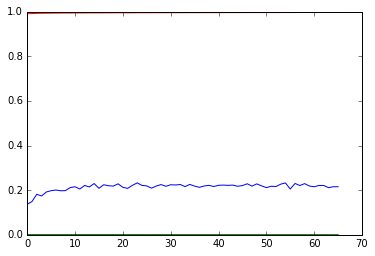

lambda =  0.1
Train on 248360 samples, validate on 82787 samples
Epoch 1/13
KS: 0.19486983147208742 : 0.09 / CvM: 0.0009752541154521062 : 0.002 / AUC: 0.9949589330255387
57s - loss: 0.5802 - label_classifier_acc: 0.9443 - domain_classifier_acc: 0.9595 - val_loss: 0.5301 - val_label_classifier_acc: 0.9499 - val_domain_classifier_acc: 0.9752
Epoch 2/13
KS: 0.19185725246778335 : 0.09 / CvM: 0.0009677288061656947 : 0.002 / AUC: 0.995004624585818
53s - loss: 0.5214 - label_classifier_acc: 0.9470 - domain_classifier_acc: 0.9751 - val_loss: 0.5231 - val_label_classifier_acc: 0.9557 - val_domain_classifier_acc: 0.9752
Epoch 3/13
KS: 0.19198714719830545 : 0.09 / CvM: 0.0009639611712703965 : 0.002 / AUC: 0.9950291935759459
53s - loss: 0.5196 - label_classifier_acc: 0.9488 - domain_classifier_acc: 0.9752 - val_loss: 0.5334 - val_label_classifier_acc: 0.9505 - val_domain_classifier_acc: 0.9752
Epoch 4/13
KS: 0.18884893432297734 : 0.09 / CvM: 0.0009690448160028907 : 0.002 / AUC: 0.9949793929046418


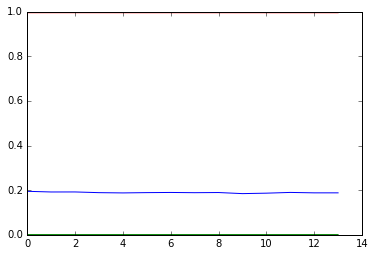

lambda =  0.175
Train on 248360 samples, validate on 82787 samples
Epoch 1/13
KS: 0.17696769889482145 : 0.09 / CvM: 0.0009539456137829631 : 0.002 / AUC: 0.9948690141397203
82s - loss: 0.5173 - label_classifier_acc: 0.9524 - domain_classifier_acc: 0.9752 - val_loss: 0.5242 - val_label_classifier_acc: 0.9508 - val_domain_classifier_acc: 0.9752
Epoch 2/13
KS: 0.1742096101473341 : 0.09 / CvM: 0.0009503369440497077 : 0.002 / AUC: 0.9948965772935514
81s - loss: 0.5176 - label_classifier_acc: 0.9520 - domain_classifier_acc: 0.9752 - val_loss: 0.5240 - val_label_classifier_acc: 0.9579 - val_domain_classifier_acc: 0.9752
Epoch 3/13
KS: 0.17414795230961216 : 0.09 / CvM: 0.0009638953387743767 : 0.002 / AUC: 0.9949141007289986
68s - loss: 0.5173 - label_classifier_acc: 0.9526 - domain_classifier_acc: 0.9752 - val_loss: 0.5284 - val_label_classifier_acc: 0.9551 - val_domain_classifier_acc: 0.9752
Epoch 4/13
KS: 0.17514431335673208 : 0.09 / CvM: 0.0009746012980783731 : 0.002 / AUC: 0.994887495820674

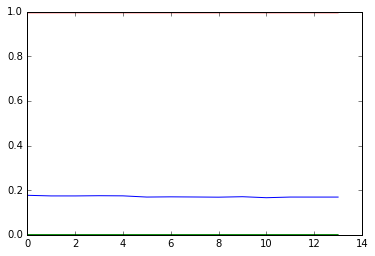

lambda =  0.25
Train on 248360 samples, validate on 82787 samples
Epoch 1/13
KS: 0.1604220355659114 : 0.09 / CvM: 0.0009657766005691782 : 0.002 / AUC: 0.994802557827221
81s - loss: 0.5175 - label_classifier_acc: 0.9535 - domain_classifier_acc: 0.9752 - val_loss: 0.5342 - val_label_classifier_acc: 0.9485 - val_domain_classifier_acc: 0.9752
Epoch 2/13
KS: 0.15328075870648744 : 0.09 / CvM: 0.0009598302638404196 : 0.002 / AUC: 0.9947863473026313
79s - loss: 0.5179 - label_classifier_acc: 0.9536 - domain_classifier_acc: 0.9752 - val_loss: 0.5437 - val_label_classifier_acc: 0.9380 - val_domain_classifier_acc: 0.9752
Epoch 3/13
KS: 0.1496463299026335 : 0.09 / CvM: 0.000969953595218821 : 0.002 / AUC: 0.9947675409522068
80s - loss: 0.5176 - label_classifier_acc: 0.9538 - domain_classifier_acc: 0.9752 - val_loss: 0.5385 - val_label_classifier_acc: 0.9372 - val_domain_classifier_acc: 0.9752
Epoch 4/13
KS: 0.15071992264982853 : 0.09 / CvM: 0.0009510456431286419 : 0.002 / AUC: 0.9948049028374293
78

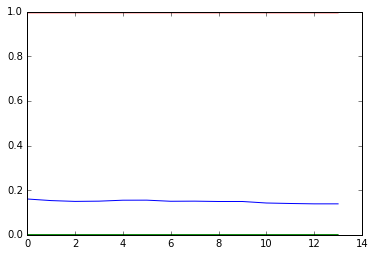

lambda =  0.325
Train on 248360 samples, validate on 82787 samples
Epoch 1/13
KS: 0.12356087646480318 : 0.09 / CvM: 0.0009775942960425022 : 0.002 / AUC: 0.9947319966225918
54s - loss: 0.5191 - label_classifier_acc: 0.9546 - domain_classifier_acc: 0.9752 - val_loss: 0.5432 - val_label_classifier_acc: 0.9446 - val_domain_classifier_acc: 0.9752
Epoch 2/13
KS: 0.12051230293103776 : 0.09 / CvM: 0.0009526403112264884 : 0.002 / AUC: 0.9946251589941586
52s - loss: 0.5195 - label_classifier_acc: 0.9542 - domain_classifier_acc: 0.9752 - val_loss: 0.5460 - val_label_classifier_acc: 0.9476 - val_domain_classifier_acc: 0.9752
Epoch 3/13
KS: 0.11393399397521403 : 0.09 / CvM: 0.0009603362420837593 : 0.002 / AUC: 0.9946496275653128
52s - loss: 0.5197 - label_classifier_acc: 0.9542 - domain_classifier_acc: 0.9752 - val_loss: 0.5490 - val_label_classifier_acc: 0.9344 - val_domain_classifier_acc: 0.9752
Epoch 4/13
KS: 0.11705539871141862 : 0.09 / CvM: 0.0009529710999424034 : 0.002 / AUC: 0.99468224171007

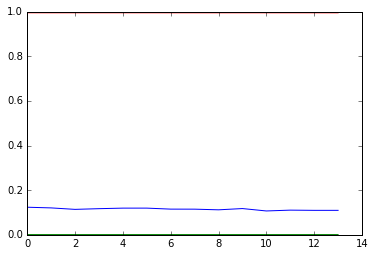

lambda =  0.4
Train on 248360 samples, validate on 82787 samples
Epoch 1/13
KS: 0.09067355215897771 : 0.09 / CvM: 0.0009708879786386461 : 0.002 / AUC: 0.9945396233084572
53s - loss: 0.5218 - label_classifier_acc: 0.9543 - domain_classifier_acc: 0.9752 - val_loss: 0.5519 - val_label_classifier_acc: 0.9436 - val_domain_classifier_acc: 0.9752
Epoch 2/13
KS: 0.0986461284485669 : 0.09 / CvM: 0.0009554614672397516 : 0.002 / AUC: 0.994582872360328
52s - loss: 0.5232 - label_classifier_acc: 0.9536 - domain_classifier_acc: 0.9752 - val_loss: 0.5448 - val_label_classifier_acc: 0.9520 - val_domain_classifier_acc: 0.9752
Epoch 3/13
KS: 0.1072617139065189 : 0.09 / CvM: 0.0009662343549288405 : 0.002 / AUC: 0.9945543774797587
52s - loss: 0.5233 - label_classifier_acc: 0.9537 - domain_classifier_acc: 0.9752 - val_loss: 0.5500 - val_label_classifier_acc: 0.9426 - val_domain_classifier_acc: 0.9752
Epoch 4/13
KS: 0.08632931740812266 : 0.09 / CvM: 0.0009793271448187621 : 0.002 / AUC: 0.9945228412858576
53

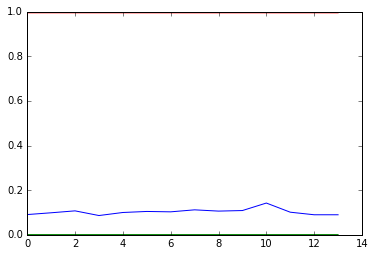

In [4]:
n_models = 1
n_epochs = 130
probs = None
for i in range(n_models):
    from keras.utils import np_utils
    y_categorical = np_utils.to_categorical(y)
    np.random.seed(42)  # repeatability

    n_extracted_features = 120
    f = feature_extractor(X.shape[1], n_extracted_features)
    l = label_classifier(n_extracted_features)
    d = label_classifier(n_extracted_features, name="domain_classifier")

    transfering_ratio = 0.5  # 0.1
    # Learning on train

    m = create_clf(f, l, d, 0)
    metrics_callback = model.ShowMetrics(m, Xa, ya, wa, Xc, mc, X, y_categorical)
    f, l, d = model.fit_model(m, X, y_categorical, y_categorical, Xa, ya,
                              wa, Xc, mc, X, y,
                              epoch_count=int((1 - transfering_ratio) * n_epochs),
                              batch_size=256, validation_split=0.05, verbose=2,
                              callbacks=[metrics_callback])
    plt.plot(metrics_callback.history)
    plt.show()
    # Transfering to check_agreement
    ya_output = model.predict_model(m, np.array(Xa_train))
    steps = 5
    for step in range(steps):
        lam = np.linspace(0.1, 0.4, steps)[step] # np.random.choice(np.linspace(1, 10, 10))
        print('lambda = ', lam)
        m = create_clf(f, l, d, lam)
        metrics_callback = model.ShowMetrics(m, Xa, ya, wa, Xc, mc, X, y_categorical)
        f, l, d = model.fit_model(m, Xa_train, ya_output, np_utils.to_categorical(ya_train), Xa, ya, wa, Xc, mc, X, y,
                                  epoch_count=int(transfering_ratio * n_epochs / steps),
                                  batch_size=512, validation_split=0.25, verbose=2,
                                  callbacks=[metrics_callback])
        plt.plot(metrics_callback.history)
        plt.show()
        p = model.predict_probs_model(m, np.array(X_test))
        data.save_submission(ids, p, "grl_prediction_{}.csv".format(lam))

    # Output
    p = model.predict_probs_model(m, np.array(X_test))
    probs = p if probs is None else p + probs
probs /= n_models

In [5]:
data.save_submission(ids, probs, "grl_prediction.csv")
!zip -9 -r grl_prediciton.csv.zip grl_prediction.csv

  adding: grl_prediction.csv (deflated 53%)
